Import libraries, check your DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import sklearn

In [ ]:
new_data = pd.read_csv('/content/misch.csv')
new_data = new_data.drop(columns=new_data.columns[0])

In [ ]:
new_data.describe()

,VOL,AREA_F,APT_NUM,ST_NUM,KREIS,ZIPCODE,YOC,MINERAL
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,1488.757282,149.025890,4.576052,4.527508,8.045307,8043.352751,1942.045307,311.598155
std,750.978506,52.561769,2.946197,1.020912,2.957143,16.248731,11.923915,265.185658
min,74.000000,30.000000,1.000000,1.000000,2.000000,8002.000000,1904.000000,9.450000
25%,856.000000,109.000000,1.000000,4.000000,6.000000,8046.000000,1933.000000,137.780000
50%,1496.000000,165.000000,5.000000,5.000000,9.000000,8048.000000,1948.000000,212.300000
75%,1945.000000,179.000000,6.000000,5.000000,11.000000,8052.000000,1950.000000,416.670000
max,3570.000000,274.000000,13.000000,7.000000,12.000000,8057.000000,1972.000000,1264.870000


One-hot encode of categorical data


In [ ]:
new_data['KREIS'] = new_data['KREIS'].astype('category')
new_data['ZIPCODE'] = new_data['ZIPCODE'].astype('category')
# One-hot encode the data using pandas get_dummies
new_data = pd.get_dummies(new_data)
print
print(new_data.columns)
print(new_data.shape)

Index(['VOL', 'AREA_F', 'APT_NUM', 'ST_NUM', 'YOC', 'MINERAL', 'KREIS_2',
       'KREIS_3', 'KREIS_4', 'KREIS_6', 'KREIS_7', 'KREIS_8', 'KREIS_9',
       'KREIS_10', 'KREIS_11', 'KREIS_12', 'ZIPCODE_8002', 'ZIPCODE_8003',
       'ZIPCODE_8004', 'ZIPCODE_8006', 'ZIPCODE_8008', 'ZIPCODE_8032',
       'ZIPCODE_8037', 'ZIPCODE_8038', 'ZIPCODE_8044', 'ZIPCODE_8045',
       'ZIPCODE_8046', 'ZIPCODE_8047', 'ZIPCODE_8048', 'ZIPCODE_8049',
       'ZIPCODE_8050', 'ZIPCODE_8051', 'ZIPCODE_8052', 'ZIPCODE_8053',
       'ZIPCODE_8055', 'ZIPCODE_8057', 'ROOF_F', 'ROOF_M', 'ROOF_O', 'ROOF_P',
       'POC_1900 - 1919', 'POC_1919 - 1945', 'POC_1946 - 1960',
       'POC_1961 - 1970', 'POC_1971 - 1980'],
      dtype='object')
(309, 45)


Split data into an hold-out TEST set (T) and train + validation set (TV)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

material = 'MINERAL'

# labels as numpy array
Y=np.array(new_data[material])

#features as numpy array
X_list= new_data.drop(columns=material)
X = np.array(X_list)

#save headers for later
headers = list(X_list.columns)

X_TV, X_T, Y_TV, Y_T = train_test_split(X,Y,test_size = 0.15, random_state = 296) #this split, meaning, this random seed, has to be the same for all the models!

print(X_T, Y_T)

[[2167  175    6 ...    0    0    0]
 [1644  169    6 ...    1    0    0]
 [ 375   55    1 ...    0    0    0]
 ...
 [1347  132    6 ...    0    0    0]
 [1807  159   11 ...    0    0    0]
 [1357  145    6 ...    1    0    0]] [212.3  585.05  50.   300.   201.74 145.51 124.77 932.76 227.27 657.84
 136.   671.14 363.68  80.44 323.56 177.27 667.39  89.96 158.28 364.7
 145.51 190.55 260.   572.76  92.54  63.64 233.31 146.65  39.71  39.96
 325.   179.63 349.05 428.59  48.   203.53 231.62 325.8  145.9   78.18
 152.38 344.13 300.   407.23 328.04 255.34 597.4 ]


Different methods of parameters tuning

RandomizedSearchCV on non-log-transformed label

In [ ]:
model_pipe =RandomForestRegressor()

#Metrics for Evualation:
met_grid= ['r2', 'neg_mean_absolute_error'] #The metric codes from sklearn

# Create the parameter grid based on the results of random search 
params = {
          'max_depth': [3,4,5,7,10,11,12,13,None],
          'max_features': ['sqrt',0.3, 0.4, 0.5, 0.6, None, 'log2'],
          'n_estimators': [800, 1000],
          'min_samples_leaf' : [1,2,3,4],
          'bootstrap' : [True, False],
          'min_impurity_decrease' : [0, 0.01, 0.05, 0.1],
          'ccp_alpha' : [0, 0.01, 0.05, 0.1]
      }

# Instantiate the grid search model
grid_search = RandomizedSearchCV(model_pipe, param_distributions = params, scoring = met_grid, refit = 'r2', n_iter = 500,
                                cv = 10, n_jobs = 1, verbose = 10, return_train_score = True)
# Fit the grid search to the data
grid_search.fit(X_TV, Y_TV)

print(pd.DataFrame(grid_search.cv_results_))
print(grid_search.best_params_)

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
[CV 3/10; 258/500] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=sqrt, min_impurity_decrease=0.01, min_samples_leaf=2, n_estimators=800; neg_mean_absolute_error: (train=-133.084, test=-166.939) r2: (train=0.556, test=0.569) total time=   1.0s
[CV 4/10; 258/500] START bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=sqrt, min_impurity_decrease=0.01, min_samples_leaf=2, n_estimators=800
[CV 4/10; 258/500] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=sqrt, min_impurity_decrease=0.01, min_samples_leaf=2, n_estimators=800; neg_mean_absolute_error: (train=-132.594, test=-137.761) r2: (train=0.593, test=0.469) total time=   1.0s
[CV 5/10; 258/500] START bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=sqrt, min_impurity_decrease=0.01, min_samples_leaf=2, n_estimators=800
[CV 5/10; 258/500] END bootstrap=True, ccp_alpha=0.01, max_depth=4, max_features=sqrt, min_impurity_decreas

In [ ]:
from google.colab import files

gd_mi = pd.DataFrame(grid_search.cv_results_)
gd_mi.to_csv('grid_search_mi.csv', encoding = 'utf-8-sig') 
files.download('grid_search_mi.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

GridSearchCV, no log-transform

In [ ]:
rf = RandomForestRegressor()

#Metrics for Evualation:
met_grid= ['r2', 'neg_mean_absolute_error'] #The metric codes from sklearn

# Create the parameter grid based on the results of random search 
params = {
          'max_depth': [7,10,13],
          'max_features': ['sqrt', 0.2, 0.3, 0.5, None],
          'n_estimators': [800],
          'min_samples_leaf' : [1,2,3],
          'bootstrap' : [True],
          'min_impurity_decrease' : [0, 0.01],
          'ccp_alpha' : [0, 0.01]
      }

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = params, scoring = met_grid, refit = 'r2',
                                cv = 10, n_jobs = 1, verbose = 10, return_train_score = True)
# Fit the grid search to the data
grid_search.fit(X_TV, Y_TV)

print(pd.DataFrame(grid_search.cv_results_))
print(grid_search.best_params_)

from google.colab import files

gd_w = pd.DataFrame(grid_search.cv_results_)
gd_w.to_csv('grid_search_w6.csv', encoding = 'utf-8-sig') 
files.download('grid_search_w6.csv')

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10; 1/180] START bootstrap=True, ccp_alpha=0, max_depth=7, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, n_estimators=800
[CV 1/10; 1/180] END bootstrap=True, ccp_alpha=0, max_depth=7, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, n_estimators=800; neg_mean_absolute_error: (train=-5.813, test=-8.858) r2: (train=0.761, test=0.145) total time=   1.8s
[CV 2/10; 1/180] START bootstrap=True, ccp_alpha=0, max_depth=7, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, n_estimators=800
[CV 2/10; 1/180] END bootstrap=True, ccp_alpha=0, max_depth=7, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, n_estimators=800; neg_mean_absolute_error: (train=-5.969, test=-8.157) r2: (train=0.736, test=0.453) total time=   1.9s
[CV 3/10; 1/180] START bootstrap=True, ccp_alpha=0, max_depth=7, max_features=sqrt, min_impurity_decrease=0, min_samples_leaf=1, n_estimators=800
[CV

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
cv_results_ = pd.read_csv('/content/grid_search_mi.csv')

In [ ]:
### THIS IS NOT NECESSARY, JUST A SANITY CHECK WHICH CONFIRMS THE NUMBERS FROM THE .csv ############

from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from statistics import mean

# Create the parameter grid based on the results of random search
chosen_index = 69 #grid_search_mi.csv

print(cv_results_['params'][chosen_index])
tv_rf = RandomForestRegressor(
    bootstrap = cv_results_['param_bootstrap'][chosen_index],
    n_estimators= cv_results_['param_n_estimators'][chosen_index],
    max_depth = cv_results_['param_max_depth'][chosen_index],
    max_features = cv_results_['param_max_features'][chosen_index],
    min_impurity_decrease = cv_results_['param_min_impurity_decrease'][chosen_index],
    min_samples_leaf = cv_results_['param_min_samples_leaf'][chosen_index],
    ccp_alpha = cv_results_['param_ccp_alpha'][chosen_index]
 )

# evaluate the model
cv = StratifiedKFold(n_splits=10, shuffle = True, random_state=42)
mae_v = cross_val_score(tv_rf, X_TV, Y_TV, scoring='neg_mean_absolute_error', cv=10, n_jobs=1)

# report performance
print('MAE:', (mean(mae_v)*(-1), "Standard deviation: ", np.std(mae_v)))

r2_v = cross_val_score(tv_rf, X_TV, Y_TV, scoring='r2', cv=10, n_jobs=1)
print('R2', (mean(r2_v), "Standard deviation: ", np.std(r2_v)))


{'n_estimators': 1000, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_features': 'log2', 'max_depth': 13, 'ccp_alpha': 0.05, 'bootstrap': True}
MAE: (89.70653786216775, 'Standard deviation: ', 14.931918346330097)
R2 (0.6790068367704678, 'Standard deviation: ', 0.1156351294535728)


Read Train + Validation results

Validation r2 score:  0.68 
 Standard deviation:  0.11
Train r2 score:  0.95 
 Standard deviation:  0.0
Validation MAE score:  -89.76 
 Standard deviation:  14.31
Train MAE score:  -37.85 
 Standard deviation:  1.16


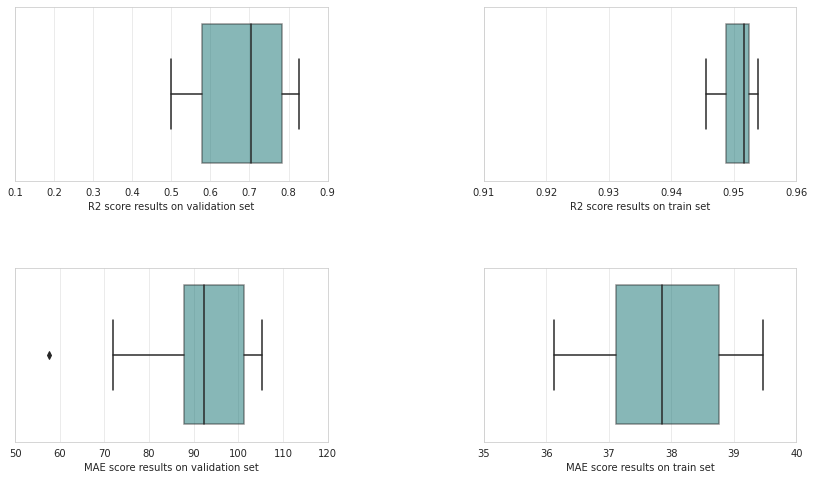

In [3]:
chosen_index = 69 #grid_search_mi.csv
r2_v = []
mae_v = []
r2_tr = []
mae_tr = []

for i in range (10):
  v_r2 = "split"+str(i)+"_test_r2"  
  v_mae = "split"+str(i)+"_test_neg_mean_absolute_error"
  r2_v.append(cv_results_[v_r2][chosen_index])
  mae_v.append(cv_results_[v_mae][chosen_index]*(-1))

  tr_r2 = "split"+str(i)+"_train_r2"  
  tr_mae = "split"+str(i)+"_train_neg_mean_absolute_error"
  r2_tr.append(cv_results_[tr_r2][chosen_index])
  mae_tr.append(cv_results_[tr_mae][chosen_index]*(-1))

print("Validation r2 score: ", round(cv_results_['mean_test_r2'][chosen_index],2), "\n Standard deviation: ", round(cv_results_['std_test_r2'][chosen_index],2) )
print("Train r2 score: ", round(cv_results_['mean_train_r2'][chosen_index],2),"\n Standard deviation: ", round(cv_results_['std_train_r2'][chosen_index],2))
print("Validation MAE score: ", round(cv_results_['mean_test_neg_mean_absolute_error'][chosen_index],2), "\n Standard deviation: ", round(cv_results_['std_test_neg_mean_absolute_error'][chosen_index],2) )
print("Train MAE score: ", round(cv_results_['mean_train_neg_mean_absolute_error'][chosen_index],2),"\n Standard deviation: ", round(cv_results_['std_train_neg_mean_absolute_error'][chosen_index],2))
metrics_TV = pd.DataFrame(list(zip(r2_v,mae_v,r2_tr,mae_tr)), columns =['r2_validation', 'MAE_validation', 'r2_train', 'MAE_train',])


metrics_TV = pd.DataFrame(list(zip(r2_v,mae_v,r2_tr,mae_tr)), columns =['r2_validation', 'MAE_validation', 'r2_train', 'MAE_train',])

spacing = 0.5
f = plt.figure(figsize=(14,8))
gs = f.add_gridspec(2, 2)
gs.update(wspace = spacing, hspace = spacing)


with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 0])
    sns.boxplot(data=metrics_TV, x="r2_validation", color = "teal", boxprops=dict(alpha=.5)).set(
    xlabel='R2 score results on validation set')
    plt.xlim(0.1,0.9)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[0, 1])
    sns.boxplot(data=metrics_TV, x="r2_train", color = "teal", boxprops=dict(alpha=.5)).set(
    xlabel='R2 score results on train set')
    plt.xlim(0.91,0.96)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 0])
    sns.boxplot(data=metrics_TV, x="MAE_validation", color = "teal", boxprops=dict(alpha=.5)).set(
    xlabel='MAE score results on validation set')
    plt.xlim(50,120)

with sns.axes_style("whitegrid", {"grid.color": ".9"}):
    ax = f.add_subplot(gs[1, 1])
    sns.boxplot(data=metrics_TV, x="MAE_train", color = "teal", boxprops=dict(alpha=.5)).set(
    xlabel='MAE score results on train set')
    plt.xlim(35,40)

f.savefig('misch_rf.png')


Hyperparameters applied to (T) set


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

r2=[]
MAE=[]

t_rf = RandomForestRegressor(
    bootstrap = cv_results_['param_bootstrap'][chosen_index],
    n_estimators= cv_results_['param_n_estimators'][chosen_index],
    max_depth = cv_results_['param_max_depth'][chosen_index],
    max_features = cv_results_['param_max_features'][chosen_index],
    min_impurity_decrease = cv_results_['param_min_impurity_decrease'][chosen_index],
    min_samples_leaf = cv_results_['param_min_samples_leaf'][chosen_index],
    ccp_alpha = cv_results_['param_ccp_alpha'][chosen_index]
 )

t_rf.fit(X_TV, Y_TV)

# Get Y predicted
predictions=t_rf.predict(X_T)

# Print out the mean absolute error (mae)
MAE = round(mean_absolute_error(Y_T, predictions),2)
print('Mean Absolute Error:', MAE)

# Print out R2
print('R2:', round(r2_score(Y_T, predictions),2))

Mean Absolute Error: 72.26
R2: 0.57


Fitted vs Actual plot (Test set)

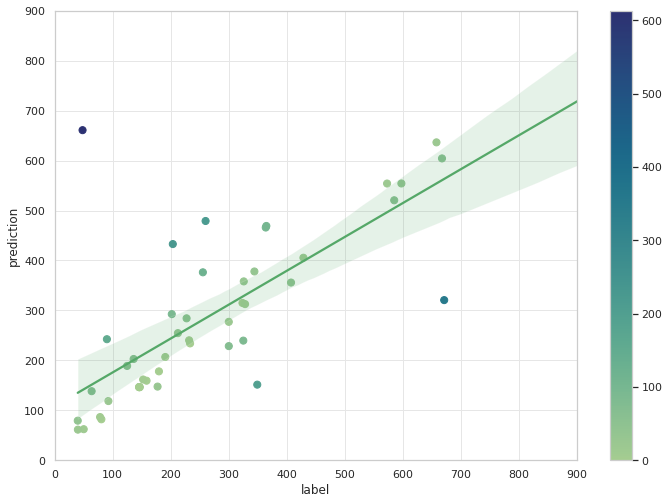

In [ ]:
# Visualising the Random Forest Regression results

limit = max(Y_T)
predictions = t_rf.predict(X_T)
mae = np.round(abs(Y_T - predictions))
d = {'label': Y_T, 'prediction': predictions, 'mae': mae}
plot = pd.DataFrame(data = d)
# plot absolute settings
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid", {"grid.color": ".9"})

points = plt.scatter(d["label"], d["prediction"], s=50, c=d["mae"], cmap="crest")
plt.colorbar(points)
plt.xlim(0, limit)
plt.ylim(0, limit)

sns.regplot(
    x="label", y="prediction", data=plot, scatter = False, color='g')
 

Absolute error in the test set plot

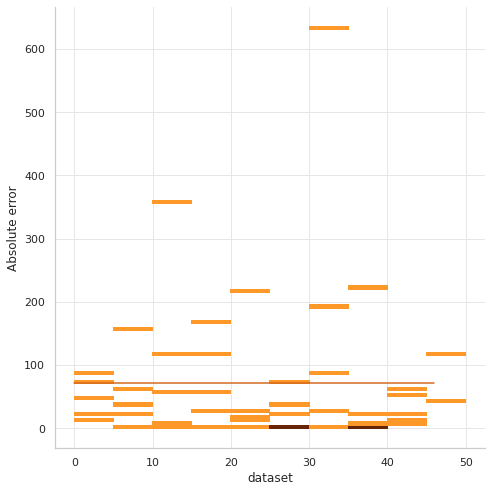

In [ ]:
# Visualising the Random Forest Regression results
n = X_T.shape[0]

sns.set_style("whitegrid", {"grid.color": ".9"})
numbers = np.array(list(range(0,int(n),+1)))

value = np.round(abs(Y_T - predictions))
d = {'Absolute error': value, 'dataset': numbers}
plot = pd.DataFrame(data = d)

sns.displot(data = plot, x="dataset", y="Absolute error", height=7,
    aspect=1, binwidth=(5, 5), cmap="YlOrBr")

sns.lineplot(data = plot, x="dataset", y=MAE, color = 'chocolate')

Feature importance

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.8 MB/s 


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 19.9 MB/s 


In [ ]:
import shap
from scipy.special import softmax
from sklearn.feature_selection import SelectFwe, chi2

def print_feature_importances_random_forest(random_forest_model):
    
    '''
    Prints the feature importances of a Random Forest model in an ordered way.
    random_forest_model -> The sklearn.ensemble.RandomForestRegressor or RandomForestClassifier trained model
    '''
    
    # Fetch the feature importances and feature names
    importances = rf.feature_importances_
    features = headers
    
    # Organize them in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    
    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f}")

def print_feature_importances_shap_values(shap_values, features):
    
    '''
    Prints the feature importances based on SHAP values in an ordered way
    shap_values -> The SHAP values calculated from a shap.Explainer object
    features -> The name of the features, on the order presented to the explainer
    '''

    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
        
    # Calculates the normalized version
    importances_norm = softmax(importances)

    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}

    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}

    # Prints the feature importances
    for k, v in feature_importances.items():
        print(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")

In [ ]:
import shap
# Fits the explainer
explainer = shap.Explainer(t_rf,feature_names = headers)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X)

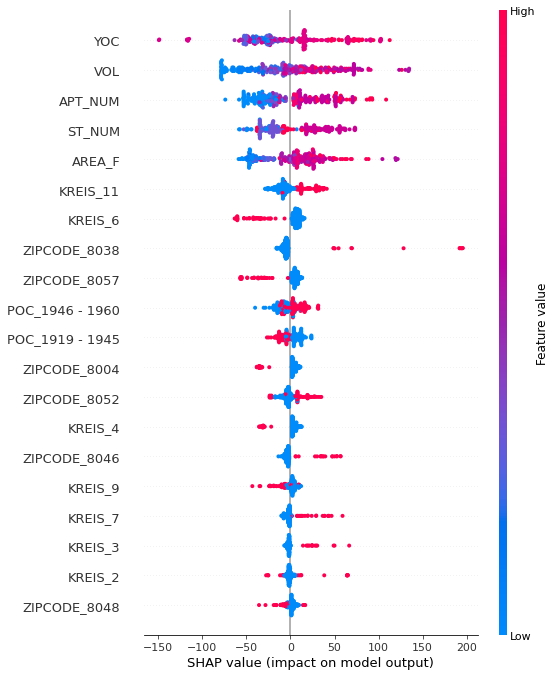

In [ ]:
shap.summary_plot(shap_values)